# Clothes Size Predictor 🧥

## EDA Process

### ➤ Libraries

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')
logger = logging.getLogger(__name__)

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root))
logger.info(f"✅ Libraries Uploaded")

[INFO] ✅ Libraries Uploaded


In [2]:
# --- Import from /src/pipelines
from src.pipeline.eda import EDAProcessor
logger.info(f"✅ Libraries Uploaded")

[INFO] ✅ Libraries Uploaded


## ➤ Import the CSV

In [4]:
# Load the cleaned dataset
file_path = os.path.abspath(os.path.join(project_root, 'data', 'processed', 'clothes_processed.csv'))

# Load the CSV into a DataFrame
try:
    clothes_df = pd.read_csv(file_path)
    logger.info(f"✅ Data successfully loaded: {clothes_df.shape[0]} rows, {clothes_df.shape[1]} columns.")
except Exception as e:
    logger.error(f"❌ Error loading data: {e}")

[INFO] ✅ Data successfully loaded: 26351 rows, 4 columns.


## ➤ Initialize EDAProcessor

In [5]:
# --- Summary
clothes_data = EDAProcessor(clothes_df, out_dir="results/eda")
clothes_data.summary()

📋 DataFrame shape: (26351, 4)

---- info() ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  26351 non-null  int64  
 1   age     26351 non-null  float64
 2   height  26351 non-null  float64
 3   size    26351 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 823.6+ KB

---- describe() ----
          count unique   top  freq        mean        std     min     25%  \
weight  26351.0    NaN   NaN   NaN   62.929452  11.040079    31.0    55.0   
age     26351.0    NaN   NaN   NaN   36.136124  10.371686     4.0    29.0   
height  26351.0    NaN   NaN   NaN  165.790931   8.050365  142.24  160.02   
size      26351      7  XXXL  6186         NaN        NaN     NaN     NaN   

          50%     75%     max  
weight   61.0    69.0   101.0  
age      34.0    43.0    68.0  
height  165.1  172.72  187.96  
size      NaN     NaN 

{'shape': (26351, 4),
 'info': {'weight': dtype('int64'),
  'age': dtype('float64'),
  'height': dtype('float64'),
  'size': dtype('O')},
 'describe':               weight           age        height   size
 count   26351.000000  26351.000000  26351.000000  26351
 unique           NaN           NaN           NaN      7
 top              NaN           NaN           NaN   XXXL
 freq             NaN           NaN           NaN   6186
 mean       62.929452     36.136124    165.790931    NaN
 std        11.040079     10.371686      8.050365    NaN
 min        31.000000      4.000000    142.240000    NaN
 25%        55.000000     29.000000    160.020000    NaN
 50%        61.000000     34.000000    165.100000    NaN
 75%        69.000000     43.000000    172.720000    NaN
 max       101.000000     68.000000    187.960000    NaN}

In [6]:
# --- Double Checking Missing Values
clothes_data.missing_values_report()

✅ No missing values detected.
Saved missing values report to results/eda\missing_values_report.csv


,missing_count,missing_pct


In [7]:
# --- Plot histograms for numeric columns and save them.
clothes_data.plot_numeric_distributions()

Saved histograms for numeric columns to results/eda


## ❏ Graphics

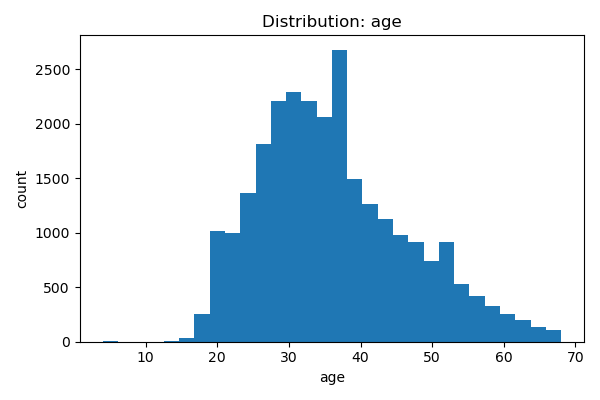

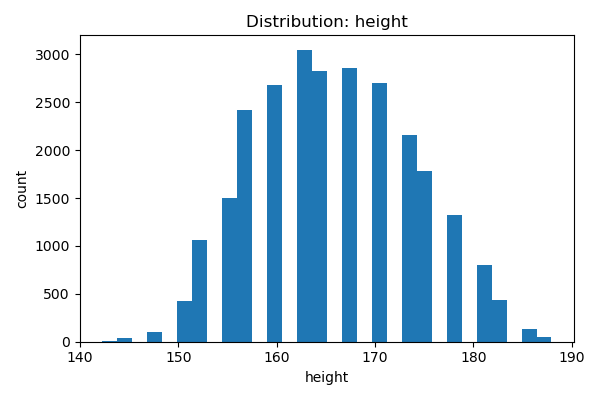

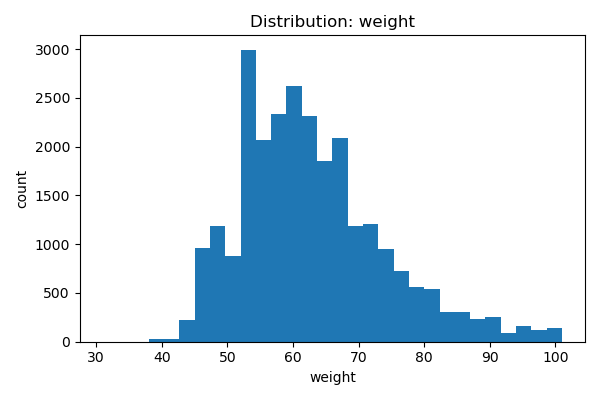

In [8]:
# --- Plot boxplots for numeric columns (one by one).
clothes_data.plot_boxplots()

Saved boxplots for numeric columns to results/eda


## ❏ Graphics

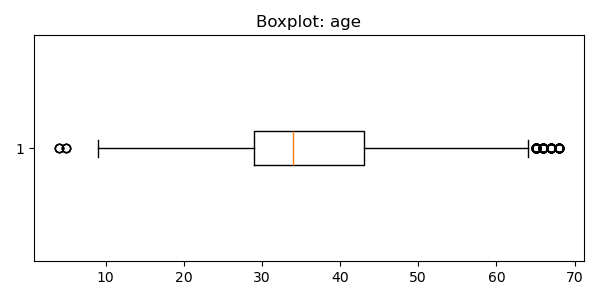
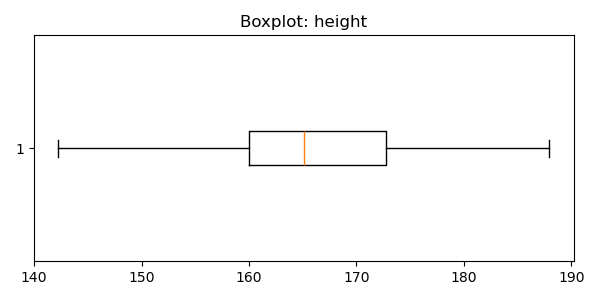
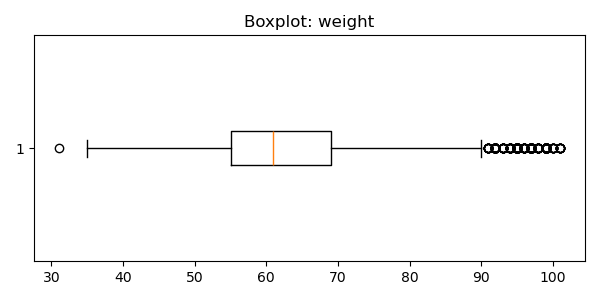


Target distribution for 'size':
       count    percent
size                  
XXXL   6186  23.475390
M      4790  18.177678
XL     4620  17.532541
L      4134  15.688209
S      4025  15.274563
XXS    2529   9.597359
XXL      67   0.254260


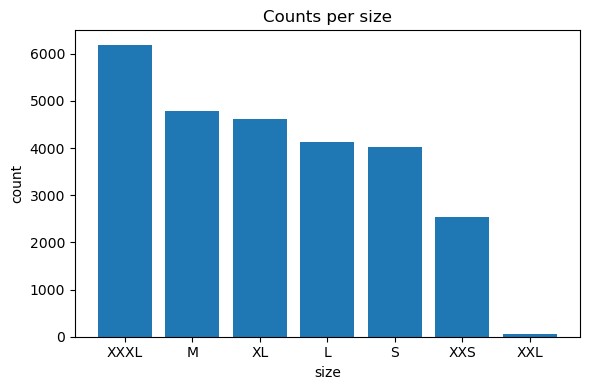

Saved target distribution plot to results/eda\target_dist_size.png


,count,percent
size,,
XXXL,6186,23.475390
M,4790,18.177678
XL,4620,17.532541
L,4134,15.688209
S,4025,15.274563
XXS,2529,9.597359
XXL,67,0.254260


In [11]:
# --- Bar plot for a categorical target column (counts and percentages).
clothes_data.plot_target_distribution(target_col="size", show=True)

In [12]:
# --- correlation heatmap for numeric columns using matplotlib imshow
clothes_data.plot_correlation_heatmap()

Saved correlation heatmap to results/eda\correlation_heatmap.png


,weight,age,height
weight,1.000000,0.039899,0.355441
age,0.039899,1.000000,-0.009187
height,0.355441,-0.009187,1.000000


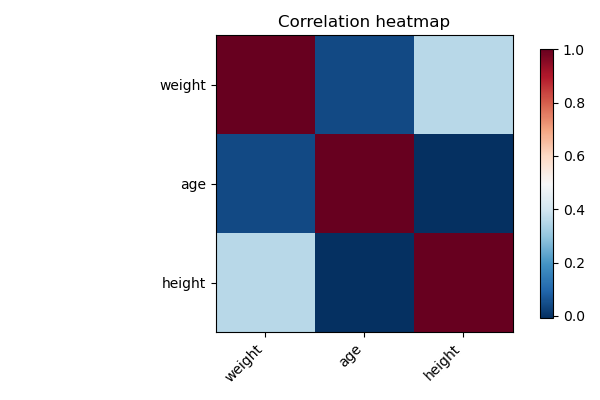